In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
pd.read_csv("Housing.csv")
House_data = pd.read_csv("Housing.csv")
House_data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [3]:
House_data.shape

(545, 13)

In [4]:
House_data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
House_data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [11]:
# Encoding the "mainroad" column
House_data.replace({"mainroad":{"yes":1,"no":0}},inplace = True)

# Encoding the "guestroom" column
House_data.replace({"guestroom":{"yes":1,"no":0}},inplace = True)

# Encoding the "basement" column
House_data.replace({"basement":{"yes":1,"no":0}},inplace = True)

# Encoding the "hotwaterheating" column
House_data.replace({"hotwaterheating":{"yes":1,"no":0}},inplace = True)

# Encoding the "airconditioning" column
House_data.replace({"airconditioning":{"yes":1,"no":0}},inplace = True)

# Encoding the "prefarea" column
House_data.replace({"prefarea":{"yes":1,"no":0}},inplace = True)

# Encoding the "furnishingstatus" column
House_data.replace({"furnishingstatus":{"furnished":1,"semi-furnished":0.5,"unfurnished":0}},inplace = True)


In [12]:
House_data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,0.5
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,0.5
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0.0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,1.0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0.0


In [13]:
House_data.dtypes

price                 int64
area                  int64
bedrooms              int64
bathrooms             int64
stories               int64
mainroad              int64
guestroom             int64
basement              int64
hotwaterheating       int64
airconditioning       int64
parking               int64
prefarea              int64
furnishingstatus    float64
dtype: object

In [14]:
#Splitting the data into splits
X = House_data.drop(["furnishingstatus"],axis =1)
Y = House_data["furnishingstatus"]

In [15]:

print(X.shape)
print(Y.shape)

# Train-Test Split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X_train.shape)  
print(Y_train.shape)  


(545, 12)
(545,)
(436, 12)
(436,)


In [19]:
# MODEL EVALUATION FOR THE TRAINING DATA
reg = LinearRegression()
reg.fit(X_train,Y_train)
reg_training_preds = reg.predict(X_train) 

error_score = metrics.r2_score(Y_train,reg_training_preds)
print(f"The R square erroris:{error_score}")

The R square erroris:0.10834243765626905


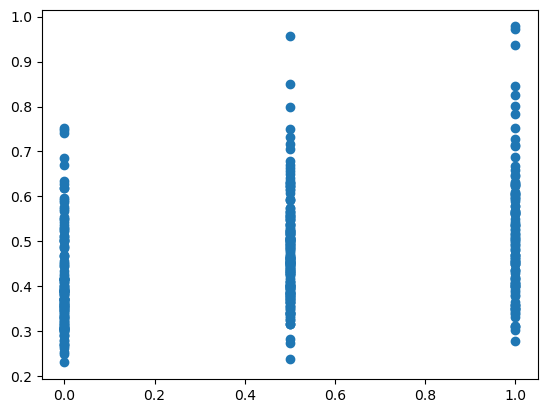

In [23]:
#Visualizing the plot
plt.scatter(Y_train,reg_training_preds)
plt.xlabel = ("Actual Price") 
plt.ylabel = ("Predicted Price")
plt.title = ("Actual Price vs Predicted Price")
plt.show();

In [24]:
# MODEL EVALUATION FOR THE TEST DATA
reg_test_preds = reg.predict(X_test)
error_score_2 = metrics.r2_score(Y_test,reg_test_preds)
print(f"The R square error for the test data is :{error_score}")

The R square error for the test data is :0.10834243765626905


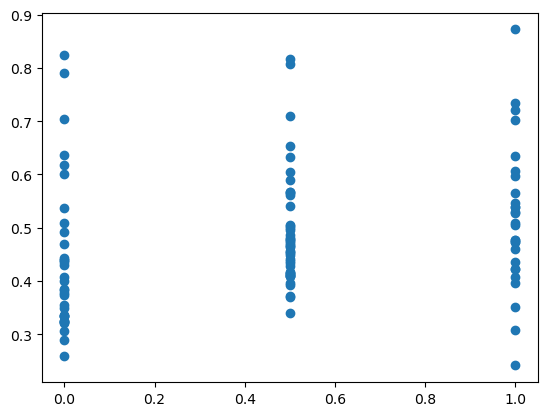

In [25]:
#Visualizing the plot
plt.scatter(Y_test,reg_test_preds)
plt.xlabel = ("Actual Price") 
plt.ylabel = ("Predicted Price")
plt.title = ("Actual Price vs Predicted Price")
plt.show();